In [39]:
import numpy as np
import scipy
from scipy import stats, signal
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["figure.figsize"] = (15,10)

#### Problem 1
Which is more probable when rolling 2 six-sided dice: rolling snake eyes or rolling sevens?

Rolling sevens is more probable because there are six ways to roll a seven and only one way to roll snake eyes. Rolling a seven is six times more likely than rolling a one.

#### Problem 2
Show how to use the convolution operator to determine the probability of the sum of 2 six sided dice.

$$P_{A+B}(x) = \sum_z P_A(z)P_B(x-z)$$

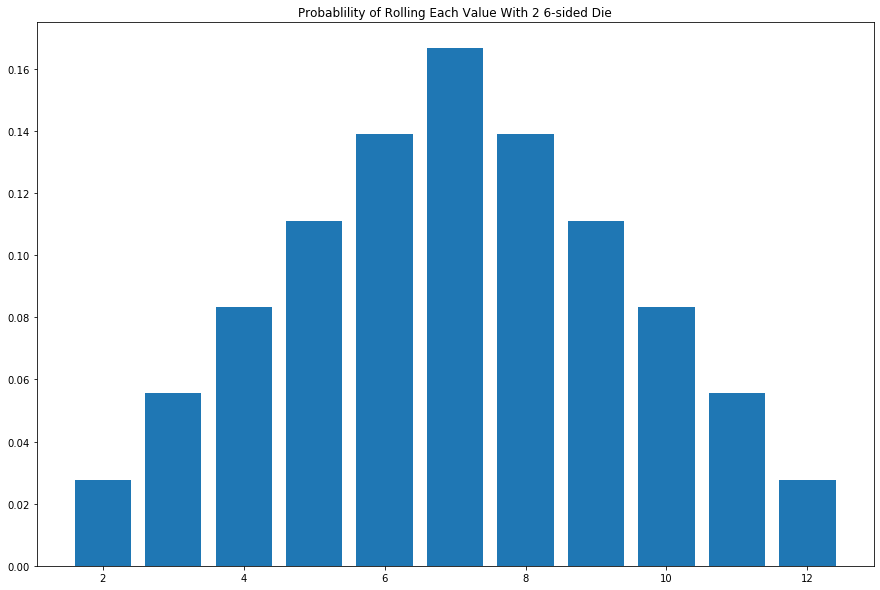

In [40]:
p = scipy.signal.fftconvolve([1/6, 1/6, 1/6, 1/6, 1/6, 1/6],[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
x = range(2,13)
plt.bar(x,p)
plt.title('Probablility of Rolling Each Value With 2 6-sided Die')
plt.show()

#### Problem 3
Calculate the mean and the variance of the distribution in problem 2.
$$<x> = \sum_x xP(x)$$
$$ <x^2> = \sum_x x^2P(x)$$
$$\sigma^2 = <x^2>-<x>^2$$

In [41]:
ex = sum(p*x)
ex2 = sum(p*np.square(x))
var = ex2 - np.square(ex)
print('Mean:',ex, 'Variance:',np.round(var,3))

Mean: 7.0 Variance: 5.833


#### Problem 4

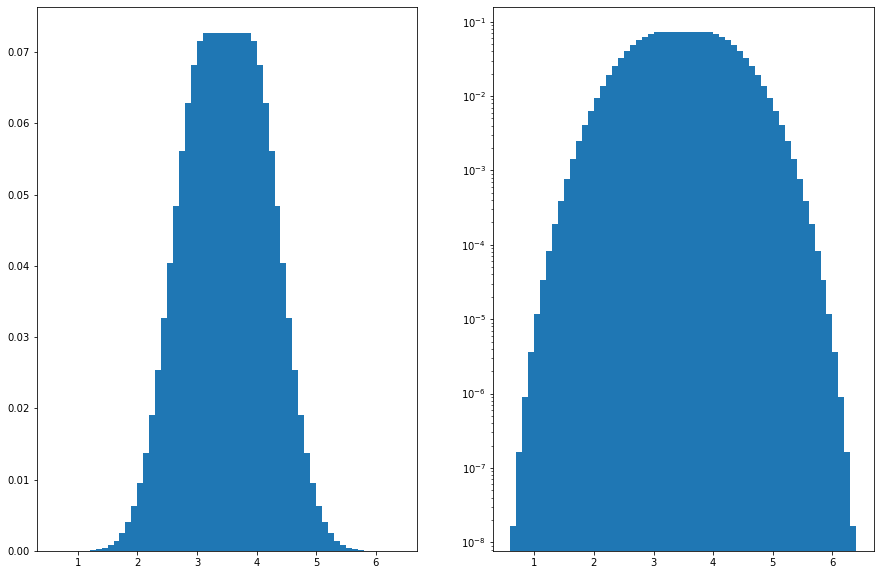

NormaltestResult(statistic=9.359817390079042, pvalue=0.009279861145739853) For the Sample
NormaltestResult(statistic=0.6116915797179173, pvalue=0.736500186496917) For a normal distribution


In [42]:
np.random.seed(1122)
x = np.arange(1, 6.1, 0.1).tolist()
p1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
p = p1
for i in range(1,10):
    p = scipy.signal.fftconvolve(p,p1)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(x,p)
ax2.bar(x,p)
ax2.set_yscale('log')
plt.show()
#Creates a sample from the distribution plotted below
sample = stats.rv_discrete(values = (x, p)).rvs(size = 50000)
normal = stats.norm.rvs(size = 50000)
#Test of the sample for normal distribution
print(stats.normaltest(sample), 'For the Sample')
print(stats.normaltest(normal), 'For a normal distribution')

The normal test is used to test the null hypothesis that the distribution comes from a normal distribution. In this case we assume that the sample comes from a normal distribution, and test the probability of that being true. Say we set the barrier for the p-value at $5\%$. If the p-value is less than this value, we can reject the null hypothesis, and in the case of our distribution this is true. This means that we can say that the sample did not come from a normal distribution. With the sample derived from a normal distribution, the p-value returned was $51.1\%$, this being greater than the threshold does not, however, mean that we can accept the null hypothesis, but rather that we cannot reject it.

#### Problem 5
Show that the sum and average of an initially Gaussian distribution is also a Guassian. How does the standard deviation of the resulting sum or average Guassian change?

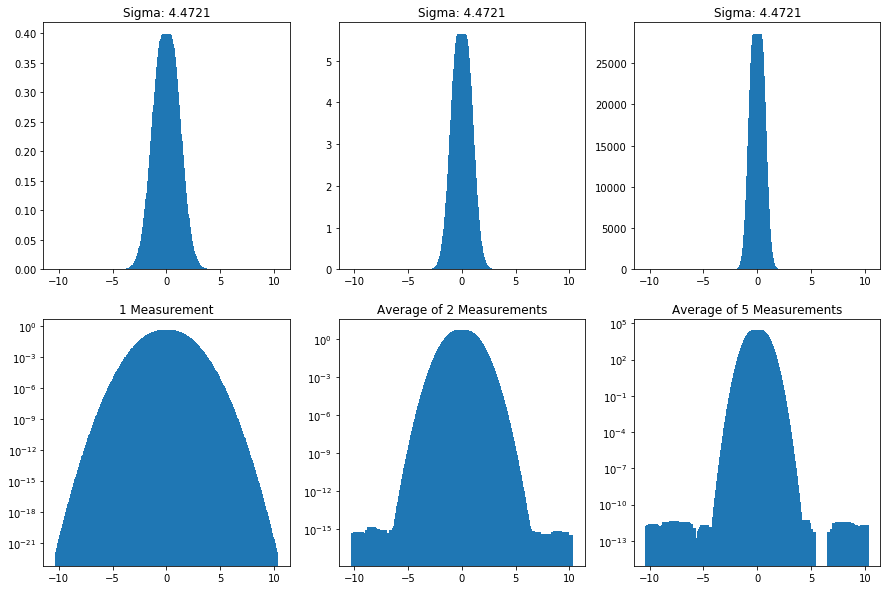

In [43]:
x1 = np.linspace(-10,10,401)
p1 = stats.norm.pdf(x1, scale = 1)
p2 = scipy.signal.fftconvolve(stats.norm.pdf(x1, scale = 1),stats.norm.pdf(x1,scale = 1))
x2 = np.linspace(-10,10,801)
p3 = stats.norm.pdf(x1, scale = 1)
for i in range(0,4):
    p3 = scipy.signal.fftconvolve(p3, stats.norm.pdf(x1, scale = 1))
x3 = np.linspace(-10,10,2001)
#Parameters for plot1
exp_x1 = sum(x1*p1)
exp_x1s = sum(p1*np.square(x1))
sig_x1 = np.round(np.sqrt(exp_x1s - exp_x1**2),4)

#Parameters for plot2
exp_x2 = sum(x2*p2/10)
exp_x2s = sum(0.1*p2*np.square(x2))
sig_x2 = np.round(np.sqrt(exp_x2s - exp_x2**2),4)

#Parameters for plot3
exp_x3 = sum(x3*p3/32000)
exp_x3s = sum((1/32000)*p3*np.square(x3))
sig_x3 = np.round(np.sqrt(exp_x3s - exp_x3**2),4)

#Plotting
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
ax1.bar(x1,p1)
ax2.bar(x2,p2)
ax3.bar(x3,p3)
ax4.bar(x1,p1)
ax5.bar(x2,p2)
ax6.bar(x3,p3)
ax4.set_yscale('log')
ax5.set_yscale('log')
ax6.set_yscale('log')
ax1.title.set_text('Sigma: ' + str(sig_x1))
ax2.title.set_text('Sigma: ' + str(sig_x2))
ax3.title.set_text('Sigma: ' + str(sig_x3))
ax4.title.set_text('1 Measurement')
ax5.title.set_text('Average of 2 Measurements')
ax6.title.set_text('Average of 5 Measurements')

In [44]:
print(sum(p1*(x1[2]-x1[1])))
print(sum(p2*(x2[2]-x2[1])))
print(sum(p3*(x3[2]-x3[1])))

0.9999999999999786
10.00000000000014
31999.999999999345


The three log y plots all show the same characteristic shape of a gausian, a $log(y)\propto-x^2$ plot. After adjusting probabilities for normalization, the $\sigma$ values for the single gaussian, two convolved gaussians, and five convolved gaussians were all the same. This means that as you integrate a signal over time you can expect eh same deviation between average measurements as you can between individual measurements.